# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
import sklearn.metrics as skm
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1205462 #replace with your ID
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255

Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [50 49 44 46 57 54 49 45 56 50]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


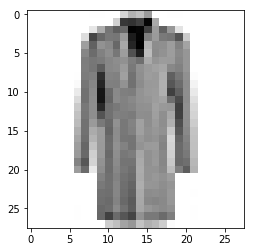

LABEL: 4
INPUT:


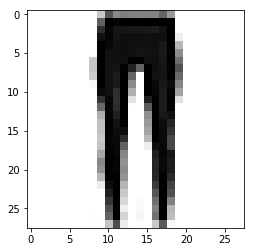

LABEL: 1
INPUT:


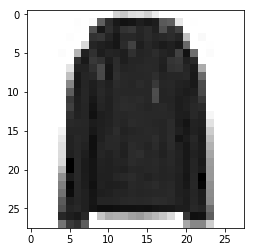

LABEL: 4
INPUT:


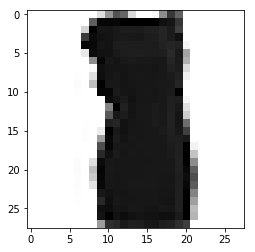

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)
plot_input(X_test,y_test,10000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 5-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

#grid of parameters for your SVC
#param_grid = [
#  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
#  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['poly']},
# ]

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#run linear SVM

### ADD CODE: FIT MODEL USING 5-fold CV
svc = SVC(kernel='linear')
clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", clf.best_params_)
### ADD CODE

print("Score with best parameters:", clf.best_score_)
### ADD CODE

print("All scores on the grid:")
### ADD CODE
results = pd.DataFrame(clf.cv_results_)
results[["params", "mean_test_score"]]

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.1}
Score with best parameters: 0.79
All scores on the grid:


,params,mean_test_score
0,{'C': 0.001},0.546
1,{'C': 0.01},0.782
2,{'C': 0.1},0.790
3,{'C': 1},0.770
4,{'C': 10},0.770
5,{'C': 100},0.770


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel

# ADD CODE

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

svc = SVC(kernel='poly', degree=2)
clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", clf.best_params_)
### ADD CODE

print("Score with best parameters:", clf.best_score_)
### ADD CODE

print("All scores on the grid:")
### ADD CODE
results = pd.DataFrame(clf.cv_results_)
results[["param_C", "param_gamma", "mean_test_score"]]

RESULTS FOR POLY DEGREE=2 KERNEL
RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 1.0}
Score with best parameters: 0.768
All scores on the grid:


,param_C,param_gamma,mean_test_score
0,0.01,0.01,0.230
1,0.01,0.1,0.742
2,0.01,1,0.768
3,0.1,0.01,0.636
4,0.1,0.1,0.764
5,0.1,1,0.768
6,1,0.01,0.742
7,1,0.1,0.768
8,1,1,0.768


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of higher degree kernel
degree = 3

### ADD CODE

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

svc = SVC(kernel='poly', degree=degree)
clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", clf.best_params_)
### ADD CODE

print("Score with best parameters:", clf.best_score_)
### ADD CODE

print("All scores on the grid:")
### ADD CODE
results = pd.DataFrame(clf.cv_results_)
results[["param_C", "param_gamma", "mean_test_score"]]

RESULTS FOR POLY DEGREE= 3  KERNEL
RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 1.0}
Score with best parameters: 0.744
All scores on the grid:


,param_C,param_gamma,mean_test_score
0,0.01,0.01,0.354
1,0.01,0.1,0.734
2,0.01,1,0.744
3,0.1,0.01,0.620
4,0.1,0.1,0.736
5,0.1,1,0.744
6,1,0.01,0.702
7,1,0.1,0.744
8,1,1,0.744


## TO DO4 
**What do you observe when fitting a higher degree polynomial on this dataset?**

The scores on the grid are slightly lower using a higher degree polynomial.

## TO DO 5
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.01,0.1]}

#run SVM with rbf kernel

### ADD CODE

print ('RESULTS FOR rbf KERNEL')

svc = SVC(kernel='rbf')
clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", clf.best_params_)
### ADD CODE

print("Score with best parameters:", clf.best_score_)
### ADD CODE

print("All scores on the grid:")
### ADD CODE
results = pd.DataFrame(clf.cv_results_)
results[["param_C", "param_gamma", "mean_test_score"]]

RESULTS FOR rbf KERNEL
RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 100, 'gamma': 0.01}
Score with best parameters: 0.812
All scores on the grid:


,param_C,param_gamma,mean_test_score
0,0.1,0.001,0.134
1,0.1,0.01,0.554
2,0.1,0.01,0.554
3,0.1,0.1,0.126
4,1,0.001,0.698
5,1,0.01,0.782
6,1,0.01,0.782
7,1,0.1,0.602
8,10,0.001,0.796
9,10,0.01,0.806


## TO DO 6
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C=100, gamma=0.01, kernel='rbf') ### ADD CODE

### ADD CODE : FIT MODEL
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.210134


## More data
Now let's do the same but using more data points for training.

### TO DO 7
Choose a new number of data points.

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [193 188 193 201 211 222 203 195 188 206]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

In [14]:
#get training and test error for the best SVM model from CV
#get training and test error for the best SVM model from CV
best_SVM = SVC(C=100, gamma=0.01, kernel='rbf') ### ADD CODE

### ADD CODE : FIT MODEL
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.166138


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

In [15]:
from sklearn import linear_model
### ADD CODE

reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)

training_error = 1. - reg.score(X_train,y_train)
test_error = 1. - reg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.037000
Best logistic regression test error: 0.187707


## TO DO 9
Compare and discuss:
- the results from SVM with m=500 and with m=30000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

In [16]:
X = X[permutation]
y = y[permutation]

m_training = 30000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [2950 2982 2988 3020 2968 3060 2978 2984 2969 3101]


In [17]:
#get training and test error for the best SVM model from CV
#get training and test error for the best SVM model from CV
best_SVM = SVC(C=100, gamma=0.01, kernel='rbf') ### ADD CODE

### ADD CODE : FIT MODEL
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000167
Best SVM test error: 0.107267


In [18]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)

training_error = 1. - reg.score(X_train,y_train)
test_error = 1. - reg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.119133
Best logistic regression test error: 0.152033


Using 30000 points as training set, the SVM test error greatly decreases (from 0.21 to 0.11), while the training error is in both cases $\sim 0$.

The Logistic Regression gives us a training and a test error bigger than the SVM. In addition, comparing to the the results obtained with 2000 points in the training set, the test error decreases more with the SVM (0.16 to 0.11) than with the Logistic Regression (0.18 to 0.15).

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

Image #14700
LR prediction = 4
SVM prediction = 6
INPUT:


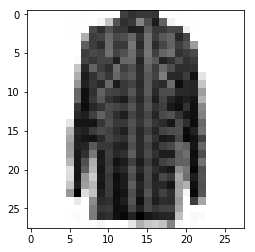

LABEL: 6


In [19]:
LR_prediction = reg.predict(X_test)       ### ADD CODE
SVM_prediction = best_SVM.predict(X_test) ### ADD CODE

wrong_index = []
### ADD CODE TO SEARCH AND VISUALIZE
for i in range(len(y_test)):
    if (SVM_prediction[i] == y_test[i]) and (LR_prediction[i] != y_test[i]):
        wrong_index.append(i)

# Select a random image
j = wrong_index[np.random.randint(0, len(wrong_index))]
print("Image #"+str(j))
print("LR prediction =",   LR_prediction[j])
print("SVM prediction =", SVM_prediction[j])
plot_input(X_test,y_test,j)

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by dividing each row for the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
np.set_printoptions(precision=2, suppress=True,floatmode='fixed') # for better aligned printing of confusion matrix

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction)### ADD CODE

print("\n Confusion matrix SVM  \n \n", confusion_SVM)

### ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

confusion_LR = skm.confusion_matrix(y_test, LR_prediction)### ADD CODE

print("\n Confusion matrix LR  \n \n", confusion_LR)

### ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

confusion_SVM_Norm = confusion_SVM.copy().astype(float)
confusion_LR_Norm  =  confusion_LR.copy().astype(float)
for i in range(len(confusion_SVM_Norm[:, 0])):
    SVM_sum = confusion_SVM[i, :].sum()
    LR_sum  = confusion_LR[i, :].sum()
    confusion_SVM_Norm[i, :] = confusion_SVM[i, :] / SVM_sum
    confusion_LR_Norm[i, :]  =  confusion_LR[i, :] /  LR_sum
    
print("\n Confusion matrix SVM Normalized  \n \n", confusion_SVM_Norm)
print("\n Confusion matrix LR Normalized  \n \n" ,  confusion_LR_Norm)


Labels and frequencies in test set:  [3050 3018 3012 2980 3032 2940 3022 3016 3031 2899]

 Confusion matrix SVM  
 
 [[2604    4   49   76    7    1  292    0   16    1]
 [   6 2963    4   30    3    0   10    0    1    1]
 [  60    2 2496   20  241    0  185    0    8    0]
 [  83   20   33 2705   82    0   50    0    7    0]
 [  21    4  239  100 2495    0  167    0    6    0]
 [   0    0    0    0    0 2830    0   73    9   28]
 [ 378    3  286   73  161    1 2102    0   18    0]
 [   0    0    0    0    0   60    0 2841    6  109]
 [  19    1   14   13    7    5   22    6 2943    1]
 [   0    0    0    0    0   20    0   75    1 2803]]

 Confusion matrix LR  
 
 [[2525   15   61  156    9    4  245    1   34    0]
 [   9 2924    9   57    7    0    9    1    2    0]
 [  42    9 2267   29  382    1  255    0   27    0]
 [ 104   29   44 2619   95    0   80    0    9    0]
 [  13    3  239  139 2347    1  270    0   19    1]
 [   2    2    4    1    0 2728    3  119   25   56]
 [ 523 

## TO DO 12
**Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.**

The lower accuracy could be due to the fact that the shape of some type of clothes can be confused more easily; for example, the worst accuracy is for cloth \#6 (*shirt*), that is often misclassified as \#0 (*T-shirt*) or \#2 (*Pullover*).